In [9]:
import pandas as pd
mean_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_md.csv")
total_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_td.csv")
occ_df = pd.read_csv("/work/users/r/p/rphadke/JSALT/eval/combined_o.csv")

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics = ["IPU", "Turn", "Pause", "Gap", "Interruption", "Backchannel"]
all_types = ['Ablation-Layered', 'Generated', 'Real']
color_map = {
    'Ablation-Layered': 'tab:blue',
    'Generated': 'tab:orange',
    'Real': 'tab:green',
}

# Mean Durations of Certain Turn Taking Metrics

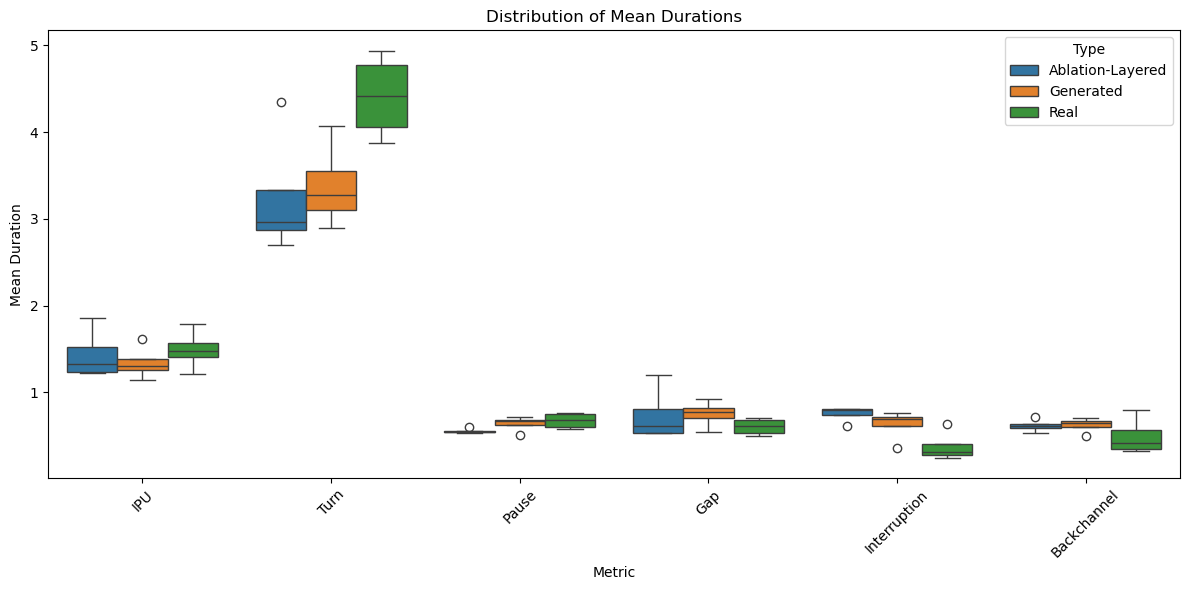

In [14]:
# Box plots: Distributions of mean durations
mean_melted = mean_df.melt(id_vars=["Type"], value_vars=metrics, var_name="Metric", value_name="Mean Duration")
plt.figure(figsize=(12, 6))
sns.boxplot(data=mean_melted, x="Metric", y="Mean Duration", hue="Type", hue_order=all_types, palette=color_map)
plt.title("Distribution of Mean Durations")
plt.xticks(rotation=45)
plt.tight_layout()

# Occurrences of Certain Turn Taking Metrics

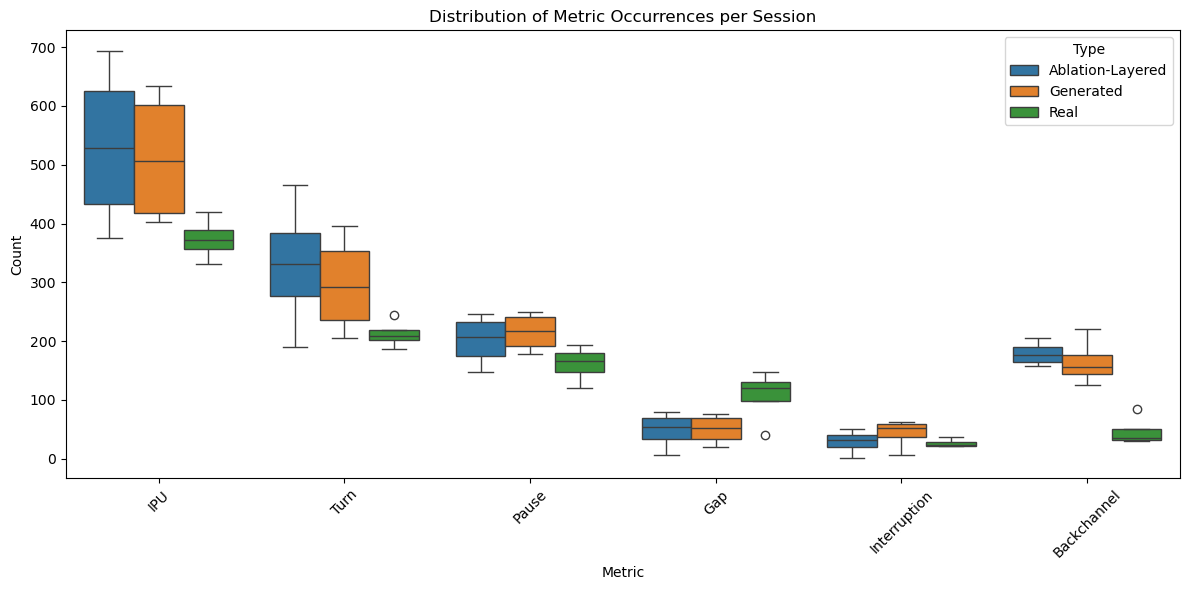

In [15]:
# === Occurrences Boxplot ===
occ_melted = occ_df.melt(id_vars=["Type"], value_vars=metrics,
                        var_name="Metric", value_name="Count")
plt.figure(figsize=(12, 6))
sns.boxplot(data=occ_melted, x="Metric", y="Count", hue="Type", hue_order=all_types, palette=color_map)
plt.title("Distribution of Metric Occurrences per Session")
plt.xticks(rotation=45)
plt.tight_layout()

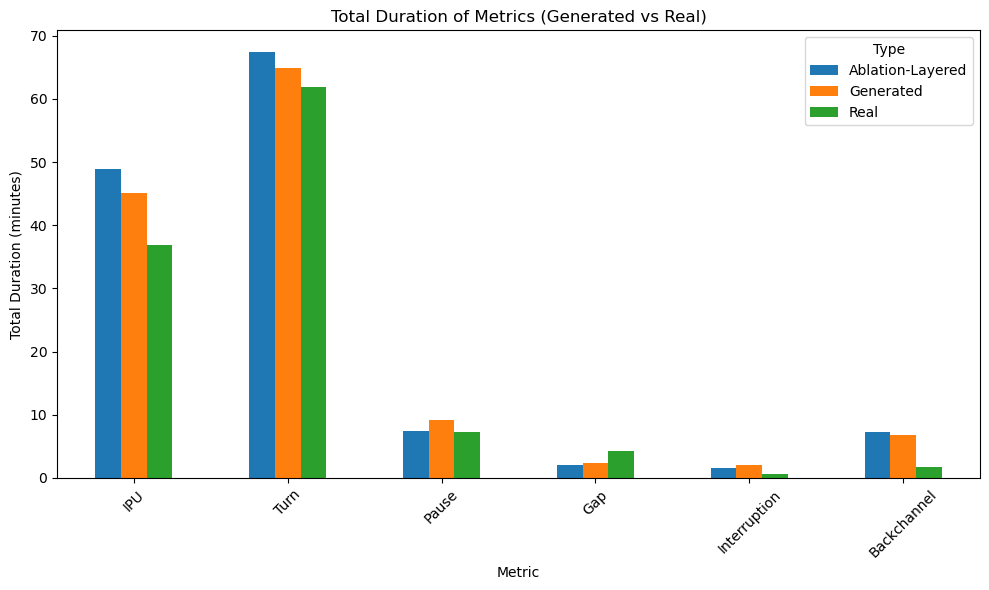

In [16]:
# Bar plots: Total durations
total_grouped = total_df.groupby("Type")[metrics].sum()
total_grouped.T.plot(kind="bar", figsize=(10, 6))
plt.title("Total Duration of Metrics (Generated vs Real)")
plt.ylabel("Total Duration (minutes)")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.tight_layout()